# Importing the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
data = pd.read_csv('data.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7067,7181-OQCUT,Male,0,No,No,21,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Month-to-month,No,Mailed check,103.85,2215,No
7068,7310-EGVHZ,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.2,No
7069,9373-WSLOY,Male,1,Yes,No,33,No,No phone service,DSL,No,...,Yes,Yes,Yes,No,Month-to-month,Yes,Electronic check,50.00,1750.85,No
7070,8957-THMOA,Female,0,No,Yes,50,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.15,970.85,No
7071,7776-QGYJC,Female,0,Yes,Yes,39,Yes,No,Fiber optic,No,...,Yes,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic),81.50,3107.3,No


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7143 entries, 0 to 7142
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7143 non-null   object 
 1   gender            7143 non-null   object 
 2   SeniorCitizen     7143 non-null   int64  
 3   Partner           7143 non-null   object 
 4   Dependents        7143 non-null   object 
 5   tenure            7143 non-null   int64  
 6   PhoneService      7143 non-null   object 
 7   MultipleLines     7143 non-null   object 
 8   InternetService   7143 non-null   object 
 9   OnlineSecurity    7126 non-null   object 
 10  OnlineBackup      7143 non-null   object 
 11  DeviceProtection  7143 non-null   object 
 12  TechSupport       7143 non-null   object 
 13  StreamingTV       7143 non-null   object 
 14  StreamingMovies   7143 non-null   object 
 15  Contract          7143 non-null   object 
 16  PaperlessBilling  7143 non-null   object 


In [5]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7143.000000,7143.000000,7143.000000
mean,0.161697,32.378132,65.932548
std,0.368198,24.554523,35.628908
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.725000
50%,0.000000,29.000000,70.400000
75%,0.000000,55.000000,89.975000
max,1.000000,72.000000,430.038097


# Missing data

In [14]:
# Checking for missing data
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity      17
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges         0
Churn                0
dtype: int64

In [15]:
# Checking column 'OnlineSecurity' as it shows 17 counts in isnull
data['OnlineSecurity']

0                        No
1                       Yes
2                       Yes
3                       Yes
4                        No
               ...         
7067                    Yes
7068    No internet service
7069                     No
7070    No internet service
7071                     No
Name: OnlineSecurity, Length: 7072, dtype: object

In [16]:
data['OnlineSecurity'].value_counts()

No                     3507
Yes                    2023
No internet service    1525
Name: OnlineSecurity, dtype: int64

##### Column OnlineSecurity is a categorical data and 50% of the people have No as the categorical value so replacing missing values with No. Using the mode of the column for data imputation.

In [17]:
data['OnlineSecurity'] = data['OnlineSecurity'].fillna(data['OnlineSecurity'].mode()[0])

In [18]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### We have no more missing values!

# Checking for duplicate entries in data

In [19]:
data.duplicated().value_counts()

False    7043
True       29
dtype: int64

##### We have found some duplicate rows in the data so removing these rows by drop_duplicate()

In [20]:
# Removing the duplicate rows
data.drop_duplicates(inplace=True)

In [21]:
data.duplicated().value_counts()

False    7043
dtype: int64

In [22]:
data.duplicated().value_counts()

False    7043
dtype: int64

##### All duplicate rows removed!

# Changing Datatype of columns 

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [24]:
# Currently datatype of column totalcharges is of the 'object' datatype 
# Changing it to float
data['TotalCharges'] = data['TotalCharges'].astype('float64')
data.info()

ValueError: could not convert string to float: ''

#### This mean we have some erroneous entries in totalcharges that are of string type instead numeric
#### Fixing that

# Fixing inconsistencies in data

In [423]:
data['TotalCharges'].map(type).value_counts()

TotalCharges
<class 'str'>    7043
Name: count, dtype: int64

In [424]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce', downcast='float')


In [425]:
data['TotalCharges'].map(type).value_counts()

TotalCharges
<class 'float'>    7043
Name: count, dtype: int64

In [426]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.500000,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.750000,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.649994,Yes


# Outlier removal

In [427]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.500000,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.750000,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.649994,Yes


In [428]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 
 17  

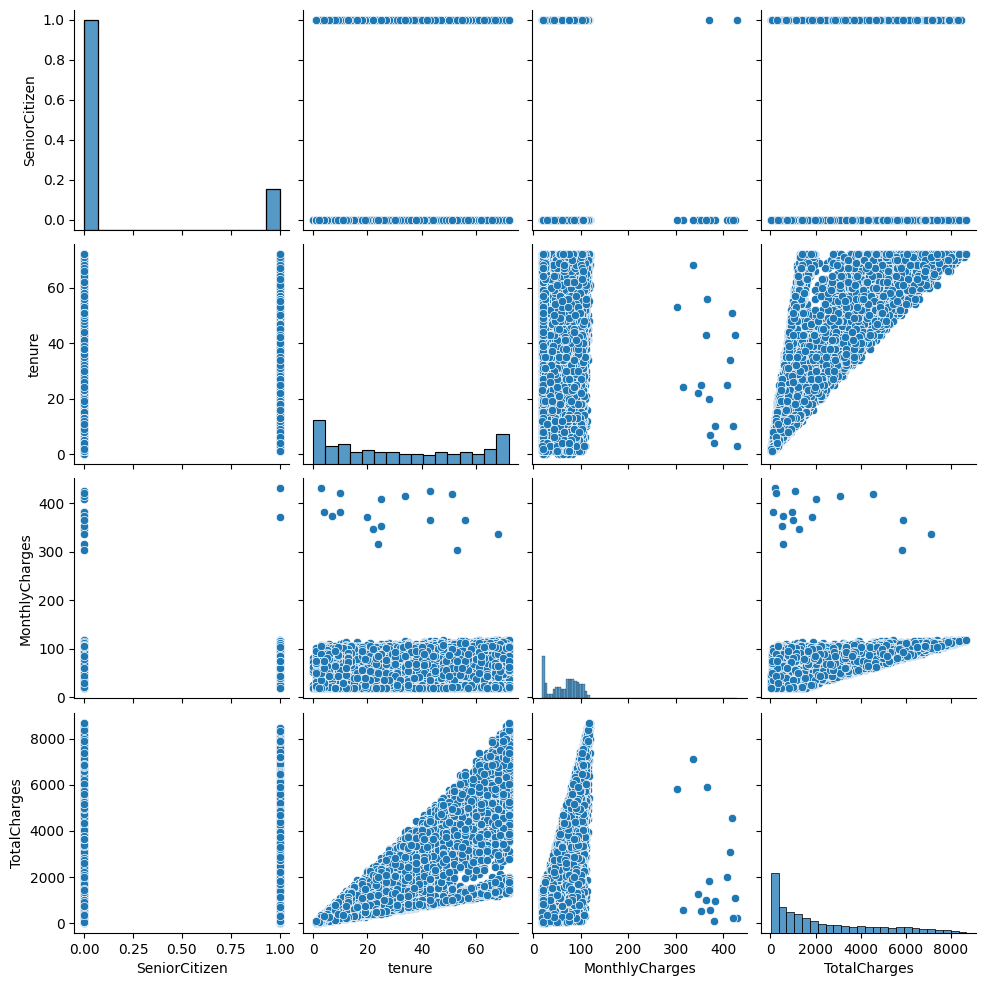

In [429]:
sns.pairplot(data=data)

In [430]:
# We have observed outliers in 
# tenure vs monthly charges
# montlycharges vs total charges

In [431]:
# Montlycharges seems to be contributing to the outlier entries
# all entries with monthly charges above 300 are outliers
# so removing all such entries
max = data['MonthlyCharges'].max()
outliers = data['MonthlyCharges'].between(300, max)
data = data[~outliers]
data.dropna(axis = 0, inplace=True)
data.isnull().sum()
# data = data[~outliers]
# data.reset_index(drop=True, inplace=True)

C:\Users\jayth\AppData\Local\Temp\ipykernel_1444\138481914.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(axis = 0, inplace=True)


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

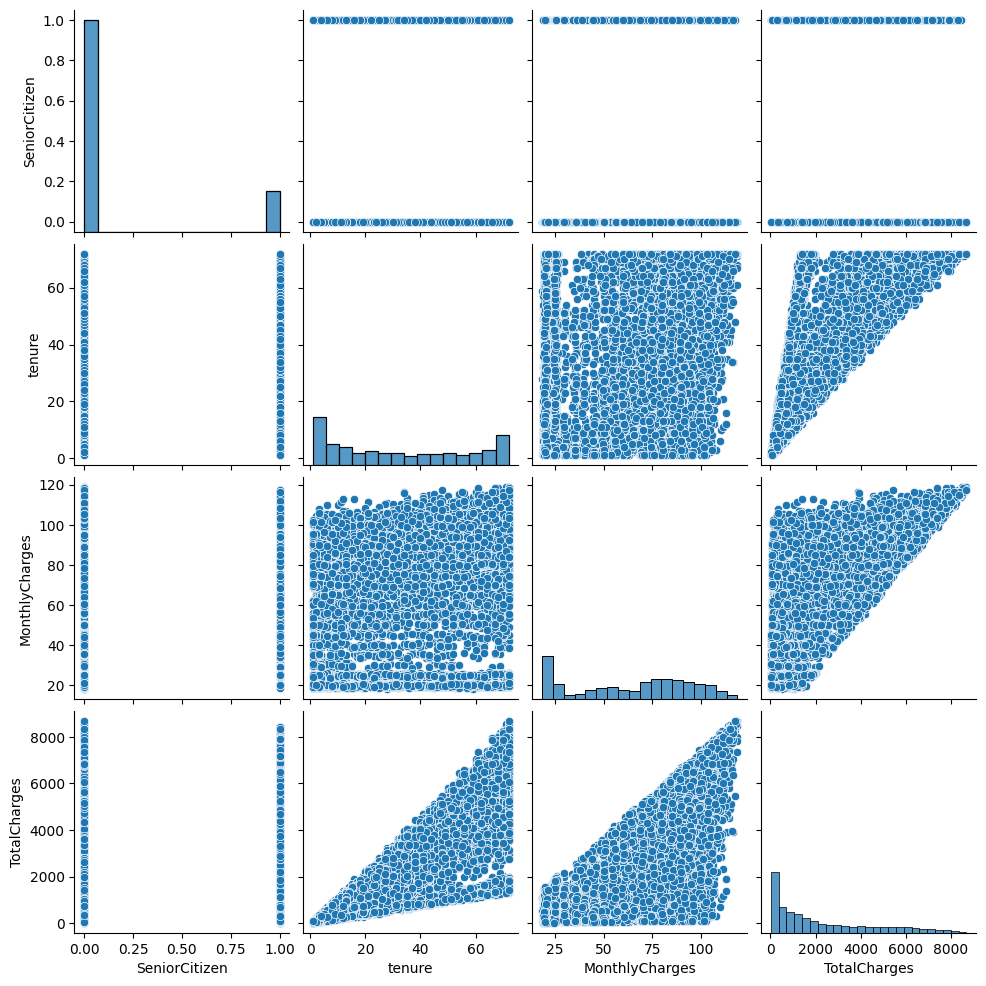

In [432]:
sns.pairplot(data=data)

In [433]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7015 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7015 non-null   object 
 1   gender            7015 non-null   object 
 2   SeniorCitizen     7015 non-null   int64  
 3   Partner           7015 non-null   object 
 4   Dependents        7015 non-null   object 
 5   tenure            7015 non-null   int64  
 6   PhoneService      7015 non-null   object 
 7   MultipleLines     7015 non-null   object 
 8   InternetService   7015 non-null   object 
 9   OnlineSecurity    7015 non-null   object 
 10  OnlineBackup      7015 non-null   object 
 11  DeviceProtection  7015 non-null   object 
 12  TechSupport       7015 non-null   object 
 13  StreamingTV       7015 non-null   object 
 14  StreamingMovies   7015 non-null   object 
 15  Contract          7015 non-null   object 
 16  PaperlessBilling  7015 non-null   object 
 17  

In [434]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [435]:
# outliers removed!

# Addressing Inconsistencies in Categorical Data: Category Merge

##### There are multiple columns that have redundant category names which can be merged into one. This will reduce the complexity of the data to some extent.

#### Column "MultipleLines" Category Merge

In [25]:
column = 'MultipleLines'
data[column].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
No     4072
Yes    2971
Name: MultipleLines, dtype: int64


In [ ]:
data.loc[data[column] == 'No phone service', column] = 'No'
data[column].value_counts()

#### Column "OnlineSecurity" Category Merge

In [437]:
column = 'OnlineSecurity'
data[column].value_counts()

OnlineSecurity
No     5009
Yes    2006
Name: count, dtype: int64

In [ ]:
data.loc[data[column] == 'No internet service', column] = 'No'
data[column].value_counts()

#### Column "OnlineBackup"Category Merge

In [438]:
column = 'OnlineBackup'
data[column].value_counts()

OnlineBackup
No     4596
Yes    2419
Name: count, dtype: int64

In [ ]:
data.loc[data[column] == 'No internet service', column] = 'No'
data[column].value_counts()

#### Column "DeviceProtection" Category Merge

In [439]:
column = 'DeviceProtection'
data[column].value_counts()

DeviceProtection
No     4602
Yes    2413
Name: count, dtype: int64

In [ ]:
data.loc[data[column] == 'No internet service', column] = 'No'
data[column].value_counts()

#### Column "TechSupport" Category Merge

In [440]:
column = 'TechSupport'
data[column].value_counts()

TechSupport
No     4977
Yes    2038
Name: count, dtype: int64

In [ ]:
data.loc[data[column] == 'No internet service', column] = 'No'
data[column].value_counts()

#### Column "StreamingTV" Category Merge

In [441]:
column = 'StreamingTV'
data[column].value_counts()

StreamingTV
No     4317
Yes    2698
Name: count, dtype: int64

In [ ]:
data.loc[data[column] == 'No internet service', column] = 'No'
data[column].value_counts()

#### Column "StreamingMovies" Category Merge

In [442]:
column = 'StreamingMovies'
data[column].value_counts()

StreamingMovies
No     4289
Yes    2726
Name: count, dtype: int64

In [ ]:
data.loc[data[column] == 'No internet service', column] = 'No'
data[column].value_counts()

# Label Encoding Categorical Columns

#### Column: Partner

In [26]:
column = 'Partner'
mapping = {'Yes': 1, 'No': 0}
data[column].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [27]:
data[column] = data[column].map(mapping)
data[column].value_counts()

0    3641
1    3402
Name: Partner, dtype: int64

#### Column: Dependents

In [28]:
column = 'Dependents'
mapping = {'Yes': 1, 'No': 0}
data[column].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [29]:
data[column] = data[column].map(mapping)
data[column].value_counts()

0    4933
1    2110
Name: Dependents, dtype: int64

#### Column: PhoneService

In [30]:
column = 'PhoneService'
mapping = {'Yes': 1, 'No': 0}
data[column].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [31]:
data[column] = data[column].map(mapping)
data[column].value_counts()

1    6361
0     682
Name: PhoneService, dtype: int64

#### Column: MultipleLines

In [32]:
column = 'MultipleLines'
mapping = {'Yes': 1, 'No': 0}
data[column].value_counts()

No     4072
Yes    2971
Name: MultipleLines, dtype: int64

In [33]:
data[column] = data[column].map(mapping)
data[column].value_counts()

0    4072
1    2971
Name: MultipleLines, dtype: int64

#### Column: OnlineSecurity

In [34]:
column = 'OnlineSecurity'
mapping = {'Yes': 1, 'No': 0}
data[column].value_counts()

No                     3510
Yes                    2014
No internet service    1519
Name: OnlineSecurity, dtype: int64

In [35]:
data[column] = data[column].map(mapping)
data[column].value_counts()

0.0    3510
1.0    2014
Name: OnlineSecurity, dtype: int64

#### Column: OnlineBackup

In [36]:
column = 'OnlineBackup'
mapping = {'Yes': 1, 'No': 0}
data[column].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [37]:
data[column] = data[column].map(mapping)
data[column].value_counts()

0.0    3088
1.0    2429
Name: OnlineBackup, dtype: int64

#### Column: DeviceProtection

In [38]:
column = 'DeviceProtection'
mapping = {'Yes': 1, 'No': 0}
data[column].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [39]:
data[column] = data[column].map(mapping)
data[column].value_counts()

0.0    3095
1.0    2422
Name: DeviceProtection, dtype: int64

#### Column: TechSupport

In [40]:
column = 'TechSupport'
mapping = {'Yes': 1, 'No': 0}
data[column].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [41]:
data[column] = data[column].map(mapping)
data[column].value_counts()

0.0    3473
1.0    2044
Name: TechSupport, dtype: int64

#### Column: StreamingTV

In [42]:
column = 'StreamingTV'
mapping = {'Yes': 1, 'No': 0}
data[column].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [43]:
data[column] = data[column].map(mapping)
data[column].value_counts()

0.0    2810
1.0    2707
Name: StreamingTV, dtype: int64

#### Column: StreamingMovies

In [44]:
column = 'StreamingMovies'
mapping = {'Yes': 1, 'No': 0}
data[column].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [45]:
data[column] = data[column].map(mapping)
data[column].value_counts()

0.0    2785
1.0    2732
Name: StreamingMovies, dtype: int64

#### Column: PaperlessBilling

In [46]:
column = 'PaperlessBilling'
mapping = {'Yes': 1, 'No': 0}
data[column].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [47]:
data[column] = data[column].map(mapping)
data[column].value_counts()

1    4171
0    2872
Name: PaperlessBilling, dtype: int64

#### Column: Churn

In [48]:
column = 'Churn'
mapping = {'Yes': 1, 'No': 0}
data[column].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [49]:
data[column] = data[column].map(mapping)
data[column].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

# Label Encoding for gender:

##### Binary encoding gender to make it similar to column having data of isMale?

In [50]:
mapping = {'Male': 1, 'Female': 0}
data['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [51]:
data['gender'] = data['gender'].map(mapping)
data['gender'].value_counts()

1    3555
0    3488
Name: gender, dtype: int64

# One-hot encoding for categorical features

#### One-hot encoding for column InternetService

In [52]:
# Converting categorical to numerical: Fetching categories of Internet Service
data['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [54]:
# Performing one-hot encoding
data = pd.get_dummies(data, columns=['InternetService'], prefix='InternetService')

# Move the new three columns to its position 9
columns = data.columns.tolist()
columns = columns[:8] + columns[-3:] + columns[8:-3]
data = data[columns]

# Renaming newly created columns
mapping = {'InternetService_DSL': 'IntrntSrvc_DSL', 'InternetService_Fiber optic': 'IntrntSrvc_FiberOptic', 'InternetService_No': 'IntrntSrvc_No'}
data.rename(columns = mapping, inplace=True)

# New columns after one hot encoding
data.iloc[:5,8:11]

KeyError: "None of [Index(['InternetService'], dtype='object')] are in the [columns]"

#### One-hot encoding for column Contract

In [55]:
# Convert categorical to numerical: Fetching categories of Contract
data['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [56]:
# Performing one-hot encoding
data = pd.get_dummies(data, columns=['Contract'], prefix='Contract')

# Move the new three columns to its position 18
columns = data.columns.tolist()
columns = columns[:17] + columns[-3:] + columns[17:-3]
data = data[columns]

# Renaming newly created columns
mapping = {'Contract_Month-to-month': 'Contract_Monthly', 'Contract_One year': 'Contract_OneYear', 'Contract_Two year': 'Contract_TwoYear'}
data.rename(columns = mapping, inplace=True)

# New columns after one hot encoding
data.iloc[:5,17:20]

,Contract_Monthly,Contract_OneYear,Contract_TwoYear
0,1,0,0
1,0,1,0
2,1,0,0
3,0,1,0
4,1,0,0
...,...,...,...
7038,0,1,0
7039,0,1,0
7040,1,0,0
7041,1,0,0


#### One-hot encoding for column PaymentMethod

In [460]:
# Convert categorical to numerical: Fetching categories of Payment Method
data['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2357
Mailed check                 1602
Bank transfer (automatic)    1538
Credit card (automatic)      1518
Name: count, dtype: int64

In [57]:
# Performing one-hot encoding
data = pd.get_dummies(data, columns=['PaymentMethod'], prefix='PaymentMethod')

# Move the new four columns to its position 22
columns = data.columns.tolist()
columns = columns[:21] + columns[-4:] + columns[21:-4]
data = data[columns]

# Renaming newly created columns
mapping = {'PaymentMethod_Bank transfer (automatic)': 'PayMthd_BankTransfer', 'PaymentMethod_Credit card (automatic)': 'PayMthd_CreditCard', 'PaymentMethod_Electronic check': 'PayMthd_ElectronicCheck', 'PaymentMethod_Mailed check': 'PayMthd_MailedCheck'}
data.rename(columns = mapping, inplace=True)

# New columns after one hot encoding
data.iloc[:5,21:25]

,PayMthd_BankTransfer,PayMthd_CreditCard,PayMthd_ElectronicCheck,PayMthd_MailedCheck
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
7038,0,0,0,1
7039,0,1,0,0
7040,0,0,1,0
7041,0,0,0,1


# Typecasting Categorical columns to data type 'category'

##### Since many of our columns are of the categorical type it is poor practice to store them as 'object' dtype thus converting them to the dtype 'category'

In [462]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,IntrntSrvc_DSL,IntrntSrvc_FiberOptic,...,Contract_OneYear,Contract_TwoYear,PaperlessBilling,PayMthd_BankTransfer,PayMthd_CreditCard,PayMthd_ElectronicCheck,PayMthd_MailedCheck,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,True,False,...,False,False,1,False,False,True,False,29.85,29.850000,0
1,5575-GNVDE,1,0,0,0,34,1,0,True,False,...,True,False,0,False,False,False,True,56.95,1889.500000,0
2,3668-QPYBK,1,0,0,0,2,1,0,True,False,...,False,False,1,False,False,False,True,53.85,108.150002,1
3,7795-CFOCW,1,0,0,0,45,0,0,True,False,...,True,False,0,True,False,False,False,42.30,1840.750000,0
4,9237-HQITU,0,0,0,0,2,1,0,False,True,...,False,False,1,False,False,True,False,70.70,151.649994,1


In [463]:
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,7015.000000,7015.000000,7015.000000,7015.000000,7015.000000,7015.000000,7015.000000,7015.000000,7015.000000,7015.000000,7015.000000,7015.000000,7015.000000,7015.000000,7015.000000,7015.000000,7015.000000
mean,0.505061,0.162509,0.482823,0.298218,32.429366,0.903065,0.421383,0.285959,0.344833,0.343977,0.290520,0.384604,0.388596,0.592730,64.796066,2283.582275,0.265859
std,0.500010,0.368943,0.499740,0.457508,24.555875,0.295891,0.493816,0.451902,0.475348,0.475067,0.454035,0.486536,0.487466,0.491361,30.076871,2266.903564,0.441821
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.799999,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.650000,401.199997,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1398.250000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3794.974976,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.799805,1.000000


In [464]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'IntrntSrvc_DSL',
       'IntrntSrvc_FiberOptic', 'IntrntSrvc_No', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract_Monthly', 'Contract_OneYear',
       'Contract_TwoYear', 'PaperlessBilling', 'PayMthd_BankTransfer',
       'PayMthd_CreditCard', 'PayMthd_ElectronicCheck', 'PayMthd_MailedCheck',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [465]:
cols = ['OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies','PaperlessBilling']
data[cols]

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling
0,0,1,0,0,0,0,1
1,1,0,1,0,0,0,0
2,1,1,0,0,0,0,1
3,1,0,1,1,0,0,0
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
7038,1,0,1,1,1,1,1
7039,0,1,1,0,1,1,1
7040,1,0,0,0,0,0,1
7041,0,0,0,0,0,0,1


In [472]:
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity','OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies','PaperlessBilling','Churn']
for col in categorical_columns:
    data[col] = data[col].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7015 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   customerID               7015 non-null   object  
 1   gender                   7015 non-null   category
 2   SeniorCitizen            7015 non-null   category
 3   Partner                  7015 non-null   category
 4   Dependents               7015 non-null   category
 5   tenure                   7015 non-null   int8    
 6   PhoneService             7015 non-null   category
 7   MultipleLines            7015 non-null   category
 8   IntrntSrvc_DSL           7015 non-null   bool    
 9   IntrntSrvc_FiberOptic    7015 non-null   bool    
 10  IntrntSrvc_No            7015 non-null   bool    
 11  OnlineSecurity           7015 non-null   category
 12  OnlineBackup             7015 non-null   category
 13  DeviceProtection         7015 non-null   category
 14  TechSupport  

# Datatype downcasting eg. int 64 to int8 etc

##### Storing data as int64,float64 etc. not only requires more space but it also increases processing times. In such scenarios, downcasting will stop wastage of space and improve data processing times during training phases of our predictive models.

In [473]:
data['tenure'] = data['tenure'].astype('int8')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7015 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   customerID               7015 non-null   object  
 1   gender                   7015 non-null   category
 2   SeniorCitizen            7015 non-null   category
 3   Partner                  7015 non-null   category
 4   Dependents               7015 non-null   category
 5   tenure                   7015 non-null   int8    
 6   PhoneService             7015 non-null   category
 7   MultipleLines            7015 non-null   category
 8   IntrntSrvc_DSL           7015 non-null   bool    
 9   IntrntSrvc_FiberOptic    7015 non-null   bool    
 10  IntrntSrvc_No            7015 non-null   bool    
 11  OnlineSecurity           7015 non-null   category
 12  OnlineBackup             7015 non-null   category
 13  DeviceProtection         7015 non-null   category
 14  TechSupport  

In [476]:
data['MonthlyCharges'] = data['MonthlyCharges'].astype('float16')
data['TotalCharges'] = data['TotalCharges'].astype('float16')
data['customerID'] = data['customerID'].astype('string')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7015 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   customerID               7015 non-null   string  
 1   gender                   7015 non-null   category
 2   SeniorCitizen            7015 non-null   category
 3   Partner                  7015 non-null   category
 4   Dependents               7015 non-null   category
 5   tenure                   7015 non-null   int8    
 6   PhoneService             7015 non-null   category
 7   MultipleLines            7015 non-null   category
 8   IntrntSrvc_DSL           7015 non-null   bool    
 9   IntrntSrvc_FiberOptic    7015 non-null   bool    
 10  IntrntSrvc_No            7015 non-null   bool    
 11  OnlineSecurity           7015 non-null   category
 12  OnlineBackup             7015 non-null   category
 13  DeviceProtection         7015 non-null   category
 14  TechSupport  

# Saving cleaned data into new csv file for EDA and Model Training

In [477]:
filename = 'clean_data.csv'
data.to_csv(filename, index=False)

In [478]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,IntrntSrvc_DSL,IntrntSrvc_FiberOptic,...,Contract_OneYear,Contract_TwoYear,PaperlessBilling,PayMthd_BankTransfer,PayMthd_CreditCard,PayMthd_ElectronicCheck,PayMthd_MailedCheck,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,True,False,...,False,False,1,False,False,True,False,29.84375,29.84375,0
1,5575-GNVDE,1,0,0,0,34,1,0,True,False,...,True,False,0,False,False,False,True,56.93750,1890.00000,0
2,3668-QPYBK,1,0,0,0,2,1,0,True,False,...,False,False,1,False,False,False,True,53.84375,108.12500,1
3,7795-CFOCW,1,0,0,0,45,0,0,True,False,...,True,False,0,True,False,False,False,42.31250,1841.00000,0
4,9237-HQITU,0,0,0,0,2,1,0,False,True,...,False,False,1,False,False,True,False,70.68750,151.62500,1
